In [75]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


wine = pd.read_csv('Unit06 wine.csv')

In [76]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
print(wine['Wine'].unique())

[1 2 3]


In [64]:
wine.drop('Wine', axis = 1, inplace = True)

In [65]:
scaler = StandardScaler()
 
features = scaler.fit(wine)
features = features.transform(wine)

In [66]:
scaled_wine = pd.DataFrame(features, columns = wine.columns)

In [67]:
x = scaled_wine.values

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

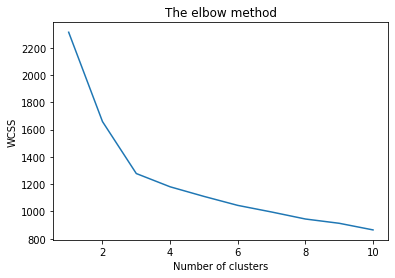

In [69]:
#elbow curve to find optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
# 3 clusters is optimal
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [71]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
centers=pca.transform(kmeans.cluster_centers_)

C:\Users\JER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


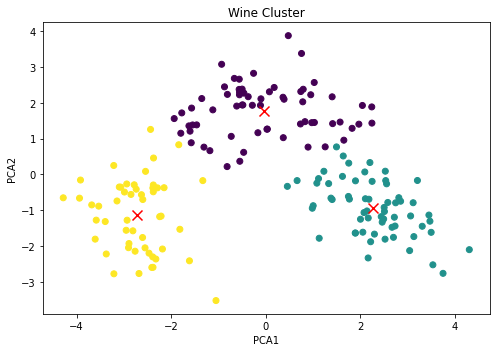

In [72]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

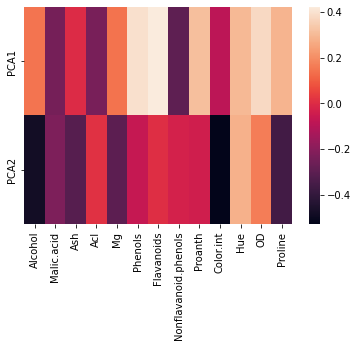

In [73]:
component_df = pd.DataFrame(pca.components_, index = ['PCA1',"PCA2"], columns = wine.columns)
# Heat map
sns.heatmap(component_df)
plt.show()
